In [42]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gseapy as gp

In [43]:
neutrophils = sc.read_h5ad("/mnt/c/Users/ouyangkang/Downloads/sub_monocytes.h5ad")

In [44]:
neutrophils.obs["category"] = ["Cancer" if "BC" in batch else "Normal" for batch in neutrophils.obs["batch"]]

In [45]:
neutrophils.obs.groupby("annotation")["category"].value_counts()

/tmp/ipykernel_6413/3031839381.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neutrophils.obs.groupby("annotation")["category"].value_counts()


annotation  category
Monocytes   Cancer      336
            Normal      295
Name: count, dtype: int64

In [46]:
neutrophils.obs["category"] = pd.Categorical(neutrophils.obs["category"], categories=["Cancer", "Normal"], ordered=True)
indices = neutrophils.obs.sort_values(["annotation", "category"]).index
neutrophils = neutrophils[indices, :]

In [47]:
neutrophils.to_df().T

,227.0,911.0,733.0,1221.0,909.0,1803.0,1846.0,1980.0,1597.0,157.0,...,2479.0,1499.0-3,1590.0-2,1576.0-3,638.0-3,198.0-4,194.0-2,1927.0-3,313.0-4,1995.0-2
AC136352.4,10.000000,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,...,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617,-0.045617
PHF1,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,...,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803,-0.056803
B3GALT4,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,...,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901,-0.031901
HCG27,-0.073014,10.000000,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,...,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014,-0.073014
MICA,-0.030952,-0.030952,-0.030952,-0.030952,-0.030952,-0.030952,-0.030952,-0.030952,-0.030952,-0.030952,...,-0.030952,-0.030952,-0.030952,-0.030952,-0.030952,-0.030952,-0.030952,-0.030952,-0.030952,-0.030952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NUP50,-0.468258,-0.468258,-0.468258,-0.468258,3.633970,-0.468258,-0.468258,-0.468258,-0.468258,-0.468258,...,-0.468258,-0.468258,0.474699,2.092219,-0.468258,-0.468258,-0.468258,1.750606,1.406706,-0.468258
NUP50-DT,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938,...,-0.302938,-0.302938,-0.302938,2.929805,1.388994,-0.302938,-0.302938,-0.302938,-0.302938,-0.302938
TTC3,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,-0.535587,...,-0.535587,-0.535587,1.742230,1.623306,-0.535587,-0.535587,-0.535587,-0.535587,1.739591,-0.535587
PACSIN2,1.674342,-0.887795,-0.887795,-0.887795,-0.887795,-0.887795,1.829464,-0.887795,-0.887795,-0.887795,...,0.218897,0.289853,-0.000199,-0.887795,0.734788,0.821548,-0.887795,-0.887795,0.354493,-0.887795


In [48]:
neutrophils

View of AnnData object with n_obs × n_vars = 631 × 23232
    obs: 'total_counts', 'pct_counts_mt', 'n_genes_by_counts', 'orig.ident', 'x', 'y', 'leiden', 'batch', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'annotation', 'sub_anno', 'category'
    var: 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-0', 'gene type-0', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable-1', 'gene type-1', 'means-2', 'dispersions-2', 'dispersions_norm-2', 'highly_variable-2', 'gene type-2', 'means-3', 'dispersions-3', 'dispersions_norm-3', 'highly_variable-3', 'gene type-3', 'means-4', 'dispersions-4', 'dispersions_norm-4', 'highly_variable-4', 'gene type-4', 'mt', 

In [49]:
sc.tl.rank_genes_groups(neutrophils,
                        groupby='category',
                        use_raw=False,
                        layer='counts',
                        method='wilcoxon',
                        groups=["Cancer"],
                        reference='Normal')

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:453: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


In [50]:
neutrophils.X.max() # already log1p

10.0

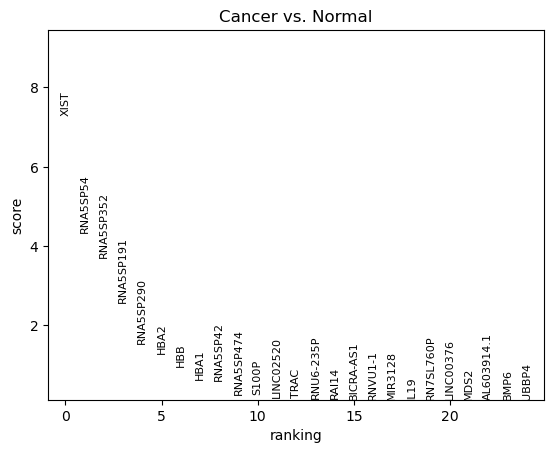

In [51]:
sc.pl.rank_genes_groups(neutrophils, n_genes=25, sharey=False)

In [52]:
# get deg result
result = neutrophils.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']})

In [53]:
degs

,Cancer_names,Cancer_scores,Cancer_pvals,Cancer_pvals_adj,Cancer_logfoldchanges
0,XIST,7.294943,2.987856e-13,2.072056e-12,29.195374
1,RNA5SP54,4.333636,1.466666e-05,6.566504e-05,1.880053
2,RNA5SP352,3.697913,2.173789e-04,8.720683e-04,2.425425
3,RNA5SP191,2.574184,1.004769e-02,3.339933e-02,5.399348
4,RNA5SP290,1.537114,1.242655e-01,3.340202e-01,1.909882
...,...,...,...,...,...
23227,MALAT1,-21.675838,3.468560e-104,1.611632e-100,-585.617615
23228,MT-RNR2,-21.690720,2.510266e-104,1.457962e-100,-inf
23229,RN7SK,-21.690939,2.498353e-104,1.457962e-100,-64.732979
23230,RN7SL1,-21.691158,2.486497e-104,1.457962e-100,-121.381546


In [54]:
# subset up or down regulated genes
degs_sig = degs[degs.Cancer_pvals_adj < 0.05]
degs_up = degs_sig[degs_sig.Cancer_logfoldchanges > 0]
degs_dw = degs_sig[degs_sig.Cancer_logfoldchanges < 0]

In [55]:
print(degs_dw.shape)
print(degs_up.shape)

(7168, 5)
(4, 5)


In [56]:
enr_up = gp.enrichr(degs_up.Cancer_names,
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)

In [57]:
# trim (go:...)
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]

In [58]:
# dotplot
gp.dotplot(enr_up.res2d, figsize=(3,5), title="Up", cmap = plt.cm.autumn_r)
plt.show()

ValueError: Warning: No enrich terms when cutoff = 0.05

In [59]:
enr_dw = gp.enrichr(degs_dw.Cancer_names,
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


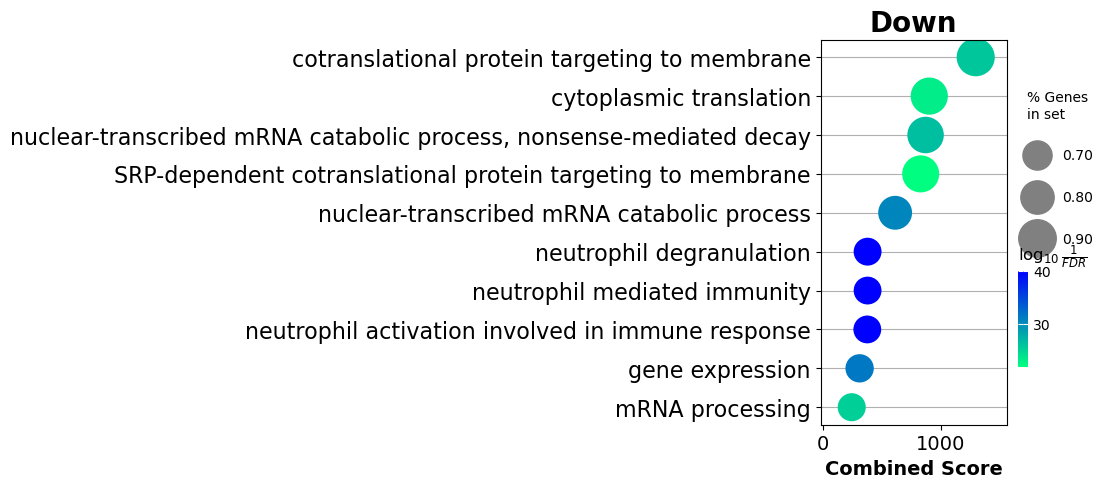

In [60]:
enr_dw.res2d.Term = enr_dw.res2d.Term.str.split(" \(GO").str[0]
gp.dotplot(enr_dw.res2d,
           figsize=(3,5),
           title="Down",
           cmap = plt.cm.winter_r,
           size=5)
plt.show()

In [61]:
# concat results
enr_up.res2d['UP_DW'] = "UP"
enr_dw.res2d['UP_DW'] = "DOWN"
enr_res = pd.concat([enr_up.res2d.head(), enr_dw.res2d.head()])

/tmp/ipykernel_6413/3980555835.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  enr_res = pd.concat([enr_up.res2d.head(), enr_dw.res2d.head()])


In [62]:
from gseapy.scipalette import SciPalette
sci = SciPalette()
NbDr = sci.create_colormap()

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


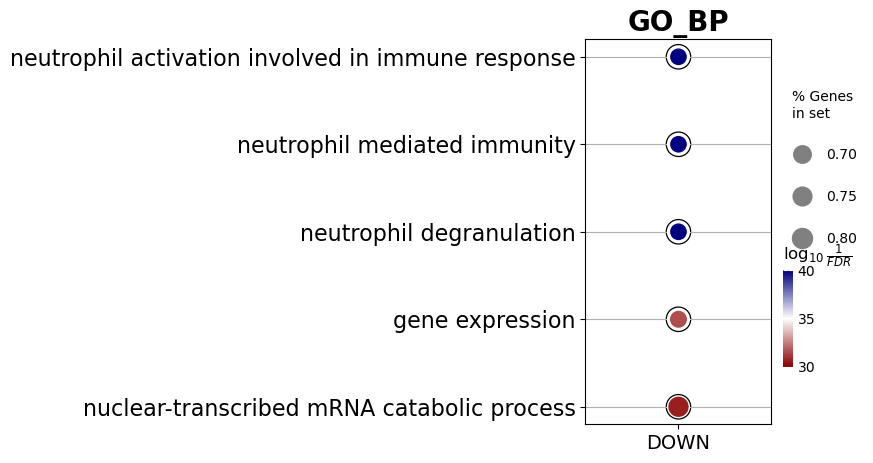

In [63]:
# display multi-datasets
ax = gp.dotplot(enr_res,figsize=(3,5),
                x='UP_DW',
                x_order = ["UP","DOWN"],
                title="GO_BP",
                cmap = NbDr.reversed(),
                size=3,
                show_ring=True)
ax.set_xlabel("")
plt.show()

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


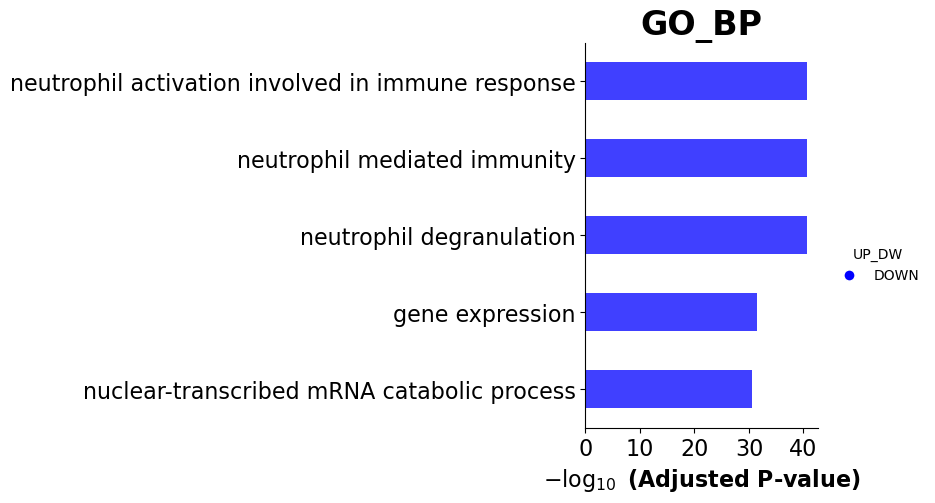

In [64]:
ax = gp.barplot(enr_res, figsize=(3,5),
                group ='UP_DW',
                title ="GO_BP",
                color = ['b','r'])

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


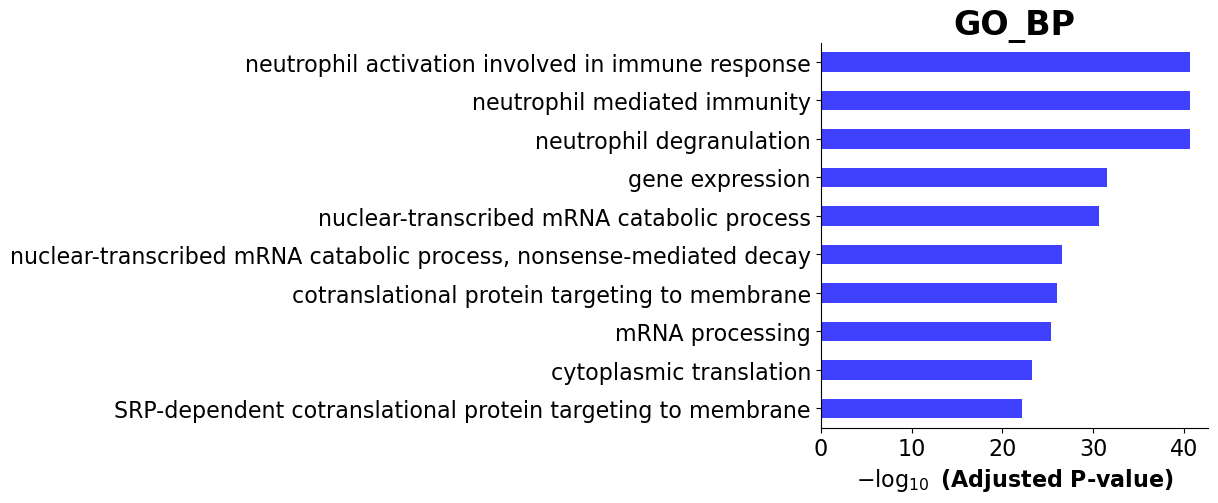

In [65]:
ax = gp.barplot(enr_dw.res2d, figsize=(5,5),
                # group ='DW',
                title ="GO_BP",
                color = "blue")

In [66]:
select_list = [enr_dw.res2d.Term[0], enr_dw.res2d.Term[1], enr_dw.res2d.Term[2], enr_dw.res2d.Term[3], enr_dw.res2d.Term[4], enr_dw.res2d.Term[11], enr_dw.res2d.Term[66], enr_dw.res2d.Term[79], enr_dw.res2d.Term[122], enr_dw.res2d.Term[319]]
enr_dw.res2d = enr_dw.res2d[enr_dw.res2d["Term"].isin(select_list)]

In [67]:
enr_dw.res2d.Term = enr_dw.res2d.Term.str.split(" \(GO").str[0]

In [68]:
enr_dw.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,UP_DW
0,GO_Biological_Process_2021,neutrophil mediated immunity,326/488,6.519550e-45,2.329938e-41,0,0,3.726457,379.135428,CDA;CYFIP1;GMFG;LGALS3;PSMD6;PSMD7;PSMD2;ANPEP...,DOWN
1,GO_Biological_Process_2021,neutrophil degranulation,322/481,1.151502e-44,2.329938e-41,0,0,3.748878,379.284004,CDA;CYFIP1;GMFG;LGALS3;PSMD6;PSMD7;PSMD2;ANPEP...,DOWN
2,GO_Biological_Process_2021,neutrophil activation involved in immune response,324/485,1.213298e-44,2.329938e-41,0,0,3.725804,376.754813,CDA;CYFIP1;GMFG;LGALS3;PSMD6;PSMD7;PSMD2;ANPEP...,DOWN
3,GO_Biological_Process_2021,gene expression,242/356,1.939398e-35,2.793218e-32,0,0,3.898045,311.563332,RPL4;RPL5;RPL30;NUP107;RPL3;RPL32;RPL31;RPL34;...,DOWN
4,GO_Biological_Process_2021,nuclear-transcribed mRNA catabolic process,139/171,2.247659e-34,2.589752e-31,0,0,7.910087,612.857736,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPL34;EIF4A3;...,DOWN
11,GO_Biological_Process_2021,"mRNA splicing, via spliceosome",182/274,4.155614e-25,1.995041e-22,0,0,3.607650,202.534079,PDCD7;EIF4A3;HNRNPU;CASC3;CWC27;CCAR1;EFTUD2;P...,DOWN
66,GO_Biological_Process_2021,macroautophagy,79/120,2.113641e-11,1.816311e-09,0,0,3.476664,85.456491,MTMR14;PRKAG1;PRKAG2;TCIRG1;TOMM20;ZFYVE1;MAP1...,DOWN
79,GO_Biological_Process_2021,RNA metabolic process,84/133,1.241740e-10,8.942082e-09,0,0,3.093410,70.558624,DDX3X;FASTKD1;FASTKD2;CELF2;HNRNPU;ADAR;ADARB1...,DOWN
122,GO_Biological_Process_2021,protein sumoylation,40/55,2.734962e-08,1.280985e-06,0,0,4.794987,83.502603,ZNF451;NUP205;POM121;NUP107;SEH1L;NUP188;IFIH1...,DOWN
319,GO_Biological_Process_2021,protein targeting to lysosome,16/20,6.907614e-05,1.243586e-03,0,0,7.174497,68.733838,SCARB2;HSPA8;NCOA4;LAPTM5;M6PR;GCC2;SORL1;AP3M...,DOWN


In [69]:
enr_dw.res2d.to_csv("/mnt/c/Users/ouyangkang/down_bp.csv", index=None)

In [70]:
import time
t1 = time.time()
# NOTE: To speed up, use gp.prerank instead with your own ranked list.
res = gp.gsea(data=neutrophils.to_df().T, # row -> genes, column-> samples
        gene_sets="GO_Biological_Process_2023",
        cls=neutrophils.obs.category,
        permutation_num=1000,
        permutation_type='phenotype',
        outdir=None,
        method='s2n', # signal_to_noise
        threads= 16)
t2=time.time()
print(t2-t1)

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/gsea.py:110: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True, ddof=0)


292.4959683418274


In [71]:
res.res2d.head(10)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,Chromatin Remodeling (GO:0006338),-0.592427,-2.767338,0.0,0.0,0.0,121/198,21.29%,KDM5D;SF3B1;SFPQ;TOP1;CHD1;KDM5A;MIER1;KDM4B;B...
1,gsea,Protein Polyubiquitination (GO:0000209),-0.577008,-2.74344,0.0,0.0,0.0,124/197,26.20%,CUL3;CTNNB1;UBE3A;ITCH;UBE2K;FBXW11;LNPEP;TRIM...
2,gsea,mRNA Processing (GO:0006397),-0.593042,-2.740567,0.0,0.0,0.0,132/193,26.59%,SRRM2;SF3B1;HNRNPA2B1;SFPQ;RBM6;PRPF4B;SYNCRIP...
3,gsea,Phosphorylation (GO:0016310),-0.553961,-2.695449,0.0,0.0,0.0,210/377,24.54%,DMPK;GRK2;SMG1;TOP1;ADAM10;PRPF4B;ROCK1;FGR;JA...
4,gsea,"RNA Splicing, Via Transesterification Reaction...",-0.582562,-2.683347,0.0,0.0,0.0,109/162,26.59%,SRRM2;SF3B1;HNRNPA2B1;RBM6;PRPF4B;SYNCRIP;HNRN...
5,gsea,"mRNA Splicing, Via Spliceosome (GO:0000398)",-0.57092,-2.646193,0.0,0.0,0.0,125/191,26.59%,SRRM2;SF3B1;HNRNPA2B1;SFPQ;RBM6;PRPF4B;SYNCRIP...
6,gsea,Peptidyl-Serine Modification (GO:0018209),-0.595701,-2.641903,0.0,0.0,0.0,97/140,29.52%,DMPK;GRK2;SMG1;TOP1;ROCK1;WNK1;HIPK1;HIPK2;TGF...
7,gsea,Protein Phosphorylation (GO:0006468),-0.529085,-2.620166,0.0,0.0,0.0,226/415,26.55%,DMPK;GRK2;SMG1;TOP1;ADAM10;PRPF4B;ROCK1;FGR;JA...
8,gsea,Positive Regulation Of Nucleic Acid-Templated ...,-0.522205,-2.619035,0.0,0.0,0.0,245/434,28.20%,HLA-DRB1;HIF1A;CTNNB1;NSD1;RXRA;IRF1;OGT;KDM5A...
9,gsea,Protein Autophosphorylation (GO:0046777),-0.57425,-2.611239,0.0,0.0,0.0,67/134,18.73%,SMG1;FGR;PTK2B;STK17B;HCK;FES;STK39;PAK2;PIKFY...


In [72]:
res.ranking.shape

(20474,)

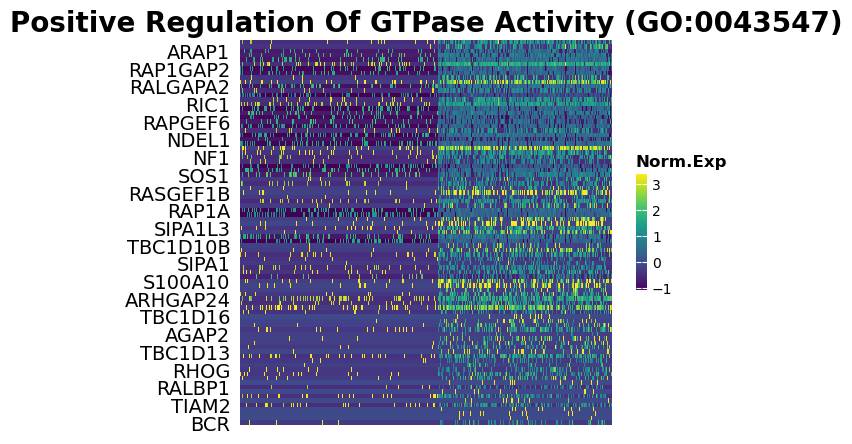

In [73]:
## Heatmap of gene expression
i = 34
genes = res.res2d.Lead_genes.iloc[i].split(";")
ax = gp.heatmap(df = res.heatmat.loc[genes],
           z_score=None,
           title=res.res2d.Term.iloc[i],
           figsize=(6,5),
           cmap=plt.cm.viridis,
           xticklabels=False)

In [74]:
# res.res2d.Term = res.res2d.Term.str.split(" \(GO").str[0]
term_list = [res.res2d.Term[0], res.res2d.Term[1], res.res2d.Term[20], res.res2d.Term[34], res.res2d.Term[102], res.res2d.Term[119], res.res2d.Term[133], res.res2d.Term[144], res.res2d.Term[177], res.res2d.Term[196], ]
term_list

['Chromatin Remodeling (GO:0006338)',
 'Protein Polyubiquitination (GO:0000209)',
 'Regulation Of GTPase Activity (GO:0043087)',
 'Positive Regulation Of GTPase Activity (GO:0043547)',
 'Actin Cytoskeleton Reorganization (GO:0031532)',
 'Regulation Of Proteasomal Ubiquitin-Dependent Protein Catabolic Process (GO:0032434)',
 'Positive Regulation Of Kinase Activity (GO:0033674)',
 'Regulation Of Anatomical Structure Morphogenesis (GO:0022603)',
 'Positive Regulation Of Cellular Process (GO:0048522)',
 'Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043122)']

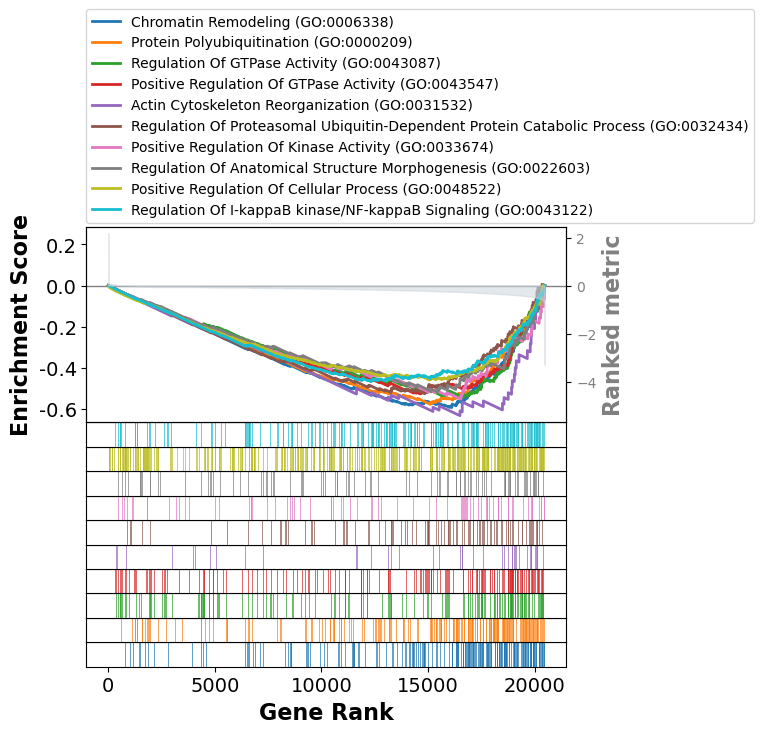

In [75]:
axs = res.plot(terms=term_list)

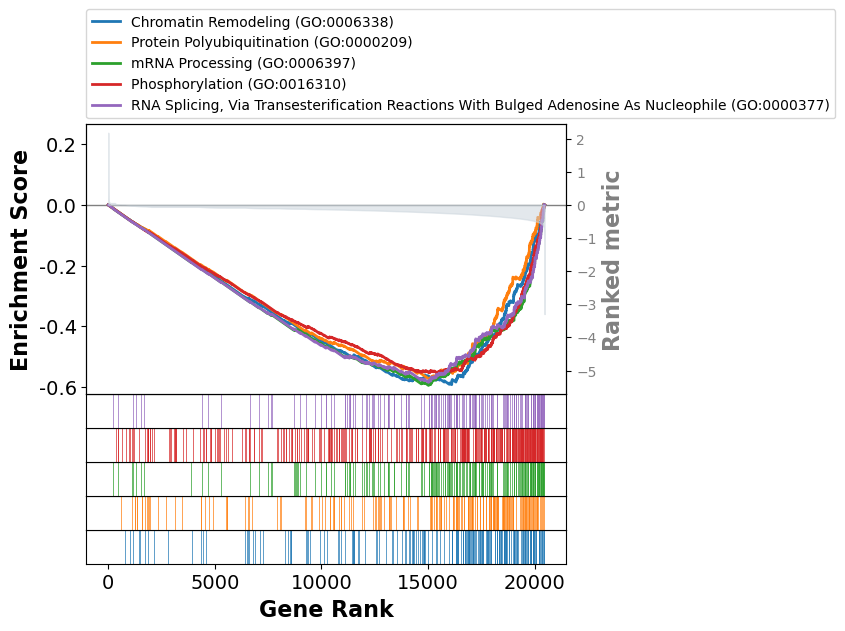

In [76]:
term = res.res2d.Term
# gp.gseaplot(res.ranking, term=term[i], **res.results[term[i]])
axs = res.plot(terms=term[:5])

In [ ]:
import networkx as nx

In [ ]:
# res.res2d.to_csv("/mnt/c/Users/ouyangkang/Desktop/comparison_analysis.csv", index=None)

In [ ]:
nodes, edges = gp.enrichment_map(res.res2d)

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


In [ ]:
nodes.Term = nodes.Term.str.split(" \(GO").str[0]

In [ ]:
res.res2d[res.res2d["FDR q-val"] > 0.05]

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
1549,gsea,Regulation Of Postsynapse Organization (GO:009...,-0.459528,-1.553265,0.029821,0.050298,0.968,7/20,20.26%,PDLIM5;CDKL5;SIPA1L1;TANC2;VPS35;LRRK2;CFL1
1550,gsea,Regulation Of Intracellular Estrogen Receptor ...,-0.497741,-1.551947,0.036961,0.050731,0.968,7/18,16.41%,KMT2D;PAK1;STRN3;CNOT1;UFM1;LATS1;UFL1
1551,gsea,Positive Regulation Of DNA Replication (GO:004...,-0.495342,-1.55142,0.048237,0.050852,0.968,6/16,17.13%,BAZ1A;DHX9;FAF1;SMARCA5;KAT7;EREG
1552,gsea,Blood Circulation (GO:0008015),-0.4394,-1.549999,0.030488,0.051308,0.968,16/30,38.13%,ROCK1;ROCK2;STAT1;TBC1D8;MYOF;GPX1;SGCD;GCLM;S...
1553,gsea,Sulfur Compound Catabolic Process (GO:0044273),-0.510819,-1.548693,0.041339,0.051725,0.968,10/15,31.12%,SGSH;GLB1;SUCLG2;GNS;HPSE;DPEP2;SUCLG1;MLYCD;S...
...,...,...,...,...,...,...,...,...,...,...
2133,gsea,Axoneme Assembly (GO:0035082),0.156137,0.505376,0.998008,1.0,1.0,24/24,84.40%,RP1;CFAP74;JHY;RSPH9;DNAJB13;CFAP46;SPAG16;LRR...
2134,gsea,External Encapsulating Structure Organization ...,-0.140322,-0.504775,1.0,0.993448,1.0,11/62,33.58%,ATP7A;ST7;NF1;APP;TGFBI;ADAMTS5;MMP17;ADAMTSL4...
2135,gsea,Cilium Movement (GO:0003341),-0.139052,-0.478354,1.0,0.996323,1.0,21/32,71.04%,DNAH1;DNHD1;SPAG6;CCDC39;TTLL3;DNAH9;SPAG17;DN...
2136,gsea,Glial Cell Differentiation (GO:0010001),0.151805,0.39845,1.0,1.0,1.0,17/17,87.80%,VCAN;MMP24;SLC8A3;PTPRZ1;HAPLN3;MYRF;EGR2;CDH2...


In [ ]:
edges

,src_idx,targ_idx,src_name,targ_name,jaccard_coef,overlap_coef,overlap_genes
0,0,1,Post-Transcriptional Regulation Of Gene Expres...,Negative Regulation Of Protein Metabolic Proce...,0.040000,0.108108,"LARP1,GIGYF2,TSC1,PCIF1"
1,0,2,Post-Transcriptional Regulation Of Gene Expres...,Regulation Of mRNA Stability (GO:0043488),0.102941,0.189189,"LARP1,CELF1,PUM2,GIGYF2,PUM1,METTL16,RC3H1"
2,0,4,Post-Transcriptional Regulation Of Gene Expres...,Positive Regulation Of Telomere Maintenance (G...,0.015625,0.035714,MAPKAPK5
3,0,8,Post-Transcriptional Regulation Of Gene Expres...,Negative Regulation Of Amide Metabolic Process...,0.048193,0.108108,"LARP1,GIGYF2,TSC1,PCIF1"
4,1,2,Negative Regulation Of Protein Metabolic Proce...,Regulation Of mRNA Stability (GO:0043488),0.082474,0.210526,"FXR1,DHX36,LARP1,YBX1,GIGYF2,SERBP1,FMR1,ROCK1"
5,1,3,Negative Regulation Of Protein Metabolic Proce...,Membrane Organization (GO:0061024),0.006410,0.014925,SNX3
6,1,4,Negative Regulation Of Protein Metabolic Proce...,Positive Regulation Of Telomere Maintenance (G...,0.010638,0.035714,DHX36
7,1,5,Negative Regulation Of Protein Metabolic Proce...,Regulation Of Peptidyl-Tyrosine Phosphorylatio...,0.009804,0.027778,PRNP
8,1,6,Negative Regulation Of Protein Metabolic Proce...,Positive Regulation Of DNA Repair (GO:0045739),0.018692,0.047619,"RPS3,FMN2"
9,1,7,Negative Regulation Of Protein Metabolic Proce...,Regulation Of Protein Kinase Activity (GO:0045...,0.015748,0.032258,"AKT1,AGAP2"


In [ ]:
edges.to_csv("correlation.csv", index=None)

In [ ]:
# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

# Add missing node if there is any
for node in nodes.index:
    if node not in G.nodes():
        G.add_node(node)

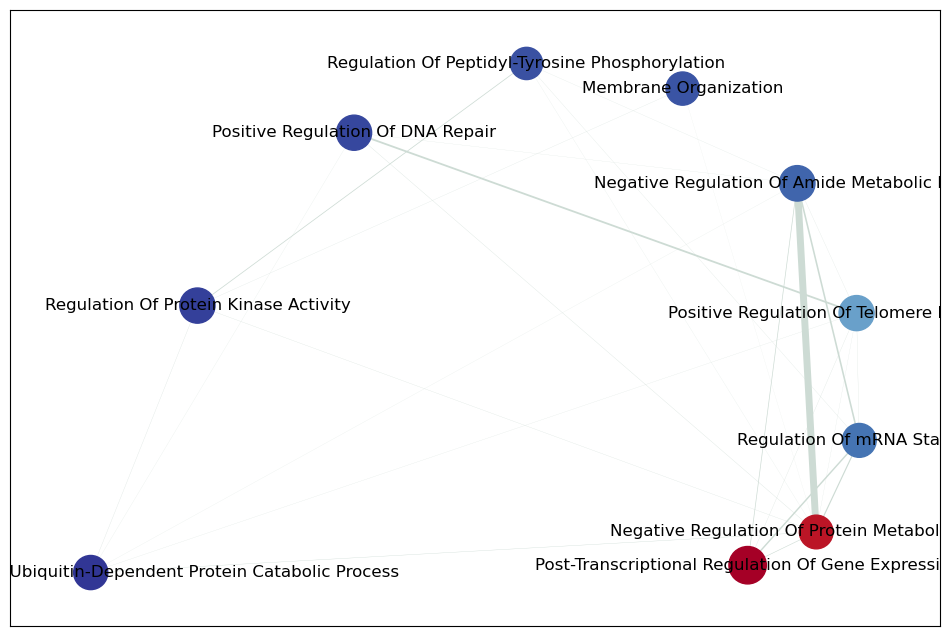

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')

plt.show()

In [ ]:
nodes.Term.to_dict()

{0: 'Glycoprotein Biosynthetic Process (GO:0009101)',
 1: 'Negative Regulation Of Tumor Necrosis Factor Production (GO:0032720)',
 2: 'Amyloid Fibril Formation (GO:1990000)',
 3: 'Positive Regulation Of Protein Serine/Threonine Kinase Activity (GO:0071902)',
 4: 'Regulation Of DNA Damage Response, Signal Transduction By P53 Class Mediator (GO:0043516)',
 5: 'Phosphatidylinositol-Mediated Signaling (GO:0048015)',
 6: 'Endosome To Lysosome Transport (GO:0008333)',
 7: 'Regulation Of Necroptotic Process (GO:0060544)',
 8: 'Phosphorylation (GO:0016310)',
 9: 'Fc-gamma Receptor Signaling Pathway (GO:0038094)'}